<a href="https://colab.research.google.com/github/zeylulbalci/dsa210project/blob/main/dsa210analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 1. Importing Libraries and Loading the Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final dataset containing box office gross, IMDb and YouTube data
df = pd.read_csv("IMDb___Gross_Dataset.csv")


# Clean numbers and convert to float
cols_to_clean = ['Gross', 'Views', 'Likes', 'Comments', 'numVotes']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")


# Fix non-numeric Gross and other numerical columns (if not already cleaned)
df['Gross'] = df['Gross'].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors="coerce")

# Apply to multiple columns if needed
cols_to_fix = ['Gross', 'Views', 'Likes', 'Comments', 'numVotes']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [16]:
# 2. Initial Overview of the Dataset
# Display general structure and check for missing values
df.info()

# Show statistical summaries such as mean, std, min, and max
df.describe()

# Preview the first few rows to verify data formatting
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   412 non-null    int64  
 1   Year         407 non-null    float64
 2   Movie        407 non-null    object 
 3   Video_ID     407 non-null    object 
 4   Views        407 non-null    float64
 5   Likes        407 non-null    float64
 6   Comments     407 non-null    float64
 7   IMDb_Rating  323 non-null    float64
 8   numVotes     323 non-null    float64
 9   key          407 non-null    object 
 10  Gross        407 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ KB


,Unnamed: 0,Year,Movie,Video_ID,Views,Likes,Comments,IMDb_Rating,numVotes,key,Gross
0,0,2023.0,Barbie,pBk4NYhWNMM,8.845537e+09,90431000.0,3734100.0,6.8,60513000.0,barbie,1.445638e+11
1,1,2023.0,The Super Mario Bros. Movie,TnGl01FkMMo,3.379040e+09,28522900.0,0.0,7.0,26719100.0,the super mario bros movie,1.362034e+11
2,2,2023.0,Oppenheimer,uYPbbksJxIg,7.304521e+09,82963400.0,3380600.0,8.3,88324500.0,oppenheimer,9.724448e+10
3,3,2023.0,Guardians of the Galaxy Vol. 3,u3V5KDHRQvk,3.529512e+09,80126500.0,3905100.0,7.9,42609500.0,guardians of the galaxy vol 3,8.455558e+10
4,4,2023.0,Fast X,32RAq6JzY-w,4.235759e+09,40000100.0,3146900.0,5.7,13456800.0,fast x,7.048750e+10


# Correlation Matrix
Purpose:
This heatmap visualizes the correlation between all key numeric variables in the dataset, such as IMDb rating, number of votes, YouTube trailer engagement, and gross revenue. It helps identify which features might be predictive of a movie's box office performance.

Interpretation:
There is a strong positive correlation between the number of IMDb votes and gross revenue. Moderate correlations also appear between likes, views, and revenue, indicating that online engagement may be a signal of commercial success.

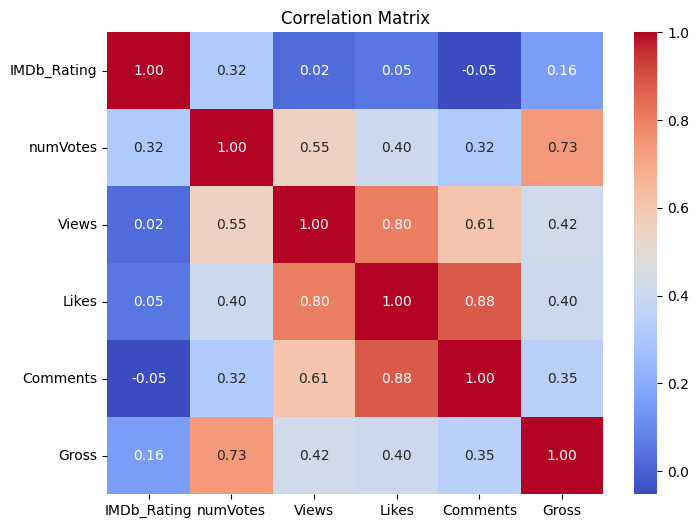

In [17]:
# 3. Correlation Matrix

# Select relevant numeric columns
numeric_cols = ['IMDb_Rating', 'numVotes', 'Views', 'Likes', 'Comments', 'Gross']

# Compute and visualize the correlation between variables
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#heatmap is used to detect which variables are positively or
#negatively correlated with Gross revenue. Variables such as IMDb votes or
#YouTube engagement are expected to show stronger relationships.

# IMDb Rating vs Gross Revenue
Purpose:
This scatter plot investigates whether higher-rated movies on IMDb earn more at the box office. IMDb rating is a measure of audience reception and quality perception.

Interpretation:
There appears to be a mild positive trend: higher IMDb ratings are somewhat associated with greater revenue. However, some outliers exist (movies with high earnings but moderate ratings) suggesting that popularity is not always driven by critical acclaim.



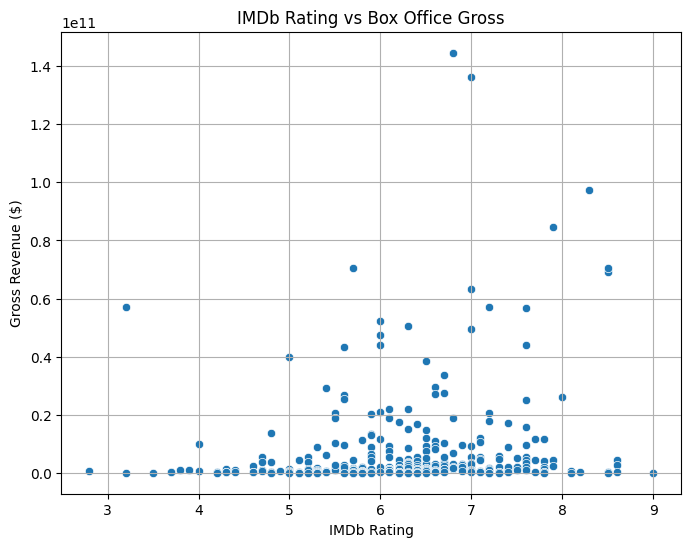

In [18]:
# Scatter plot to explore relationship between IMDb rating and revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='IMDb_Rating', y='Gross')
plt.title("IMDb Rating vs Box Office Gross")
plt.xlabel("IMDb Rating")
plt.ylabel("Gross Revenue ($)")
plt.grid(True)
plt.show()

# YouTube Likes vs Gross Revenue
Purpose:
This plot analyzes whether the number of likes on a movie's trailer correlates with revenue. Likes can reflect excitement and early approval from viewers before the release.

Interpretation:
A weak to moderate positive relationship is visible. While some high-grossing films have high likes, others do not. This suggests that likes alone may not be a reliable predictor but can still provide early insights into audience interest.

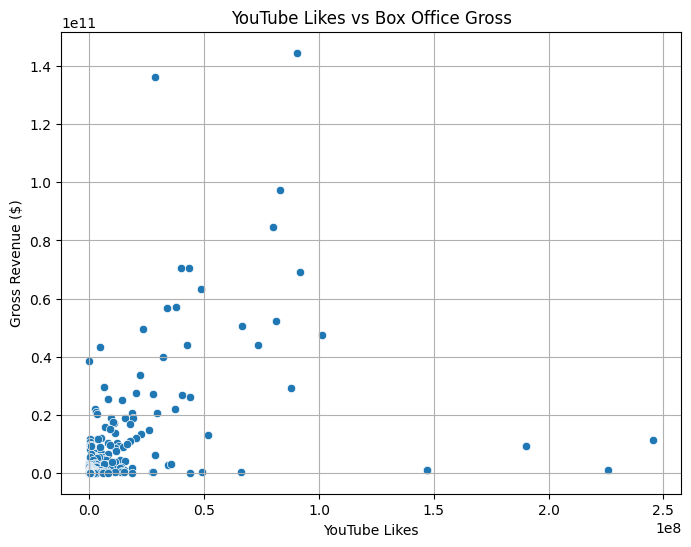

In [19]:
#5. YouTube Likes vs Gross Revenue

# Scatter plot to examine correlation between trailer likes and gross
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Likes', y='Gross')
plt.title("YouTube Likes vs Box Office Gross")
plt.xlabel("YouTube Likes")
plt.ylabel("Gross Revenue ($)")
plt.grid(True)
plt.show()

# YouTube Views vs Gross Revenue
Purpose:
This plot explores the relationship between how many times a trailer has been viewed and the film's total box office revenue. Views may signal how widely a movie is being promoted or anticipated.

Interpretation:
There is a moderate correlation — trailers with high view counts often correspond to higher revenue. However, marketing campaigns and franchise recognition may also drive views, not just audience interest.



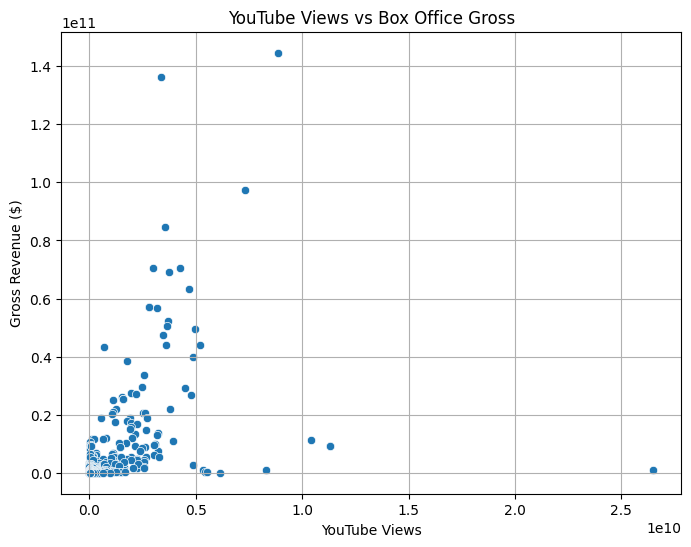

In [20]:
# 6. YouTube Views vs Gross Revenue

# Scatter plot to analyze the impact of trailer views on revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Views', y='Gross')
plt.title("YouTube Views vs Box Office Gross")
plt.xlabel("YouTube Views")
plt.ylabel("Gross Revenue ($)")
plt.grid(True)
plt.show()

# IMDb Number of Votes vs Gross Revenue
Purpose:
This visualization looks at how the number of people who rated a movie on IMDb relates to how much it earned. Number of votes reflects how widely a film was seen and discussed.

Interpretation:
This is one of the strongest predictors of box office revenue. A larger number of votes generally means the film reached a wider audience, which aligns with higher commercial performance.

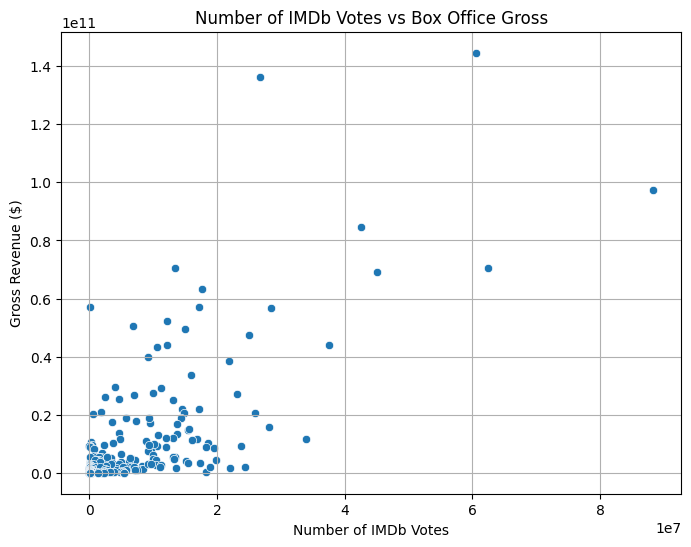

In [21]:
#7. IMDb Number of Votes vs Gross Revenue
# Analyze whether number of ratings (as a popularity metric) relates to earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='numVotes', y='Gross')
plt.title("Number of IMDb Votes vs Box Office Gross")
plt.xlabel("Number of IMDb Votes")
plt.ylabel("Gross Revenue ($)")
plt.grid(True)
plt.show()

# Distribution of IMDb Ratings
Purpose:
This histogram shows how the IMDb ratings are distributed across all movies in the dataset. It helps understand whether the sample includes mostly well-reviewed or poorly reviewed films.

Interpretation:
Most ratings fall between 5.5 and 8, indicating that the dataset contains generally above average films. There are very few extremely low or high rated films.

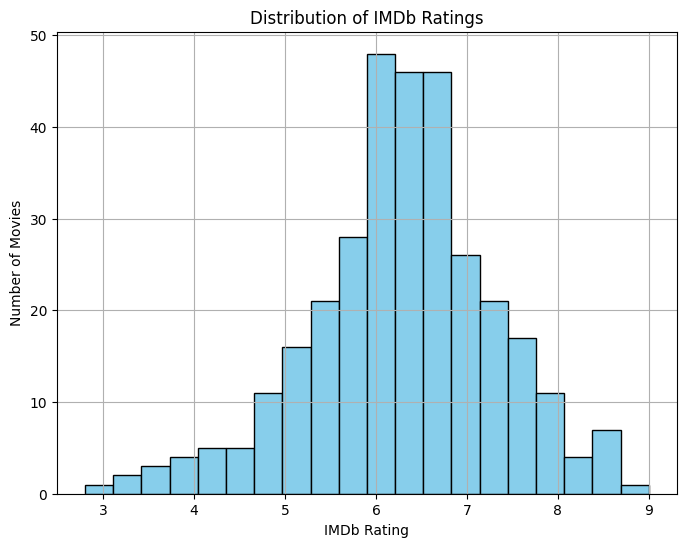

In [22]:
#8. IMDb Rating Distribution

# Histogram to see how IMDb ratings are distributed across the sample
plt.figure(figsize=(8, 6))
df['IMDb_Rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()